This notebook details a brief introduction to a number of traditional edge detection methods as well as how to implement them

## Sobel Mask
The Sobel mask works by filtering the image using two filters designed to detect horizontal and vertical edges. The output from these two filters is then summed and a threshold on the intensity of this summation is used to detect edges. Effectively the method is a very simple way of estimating gradients in the image. High gradient areas are then taken to be edges. 

In [30]:
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import filters

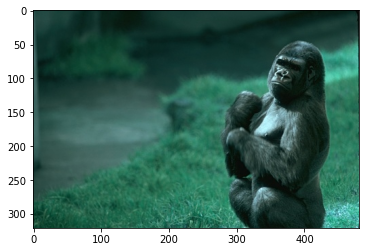

In [4]:
img_gur = cv.imread('49024.jpg')
plt.imshow(img_gur)

In [19]:
#define funtion to perform sobel edge detection
def sobel(img):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    gx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    gy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    img_gx = cv.filter2D(img_gray,-1,gx)
    img_gy = cv.filter2D(img_gray,-1,gy)

    img_filt = img_gx + img_gy
    
    t,img_out = cv.threshold(img_filt,150,255,cv.THRESH_BINARY)
    return img_out

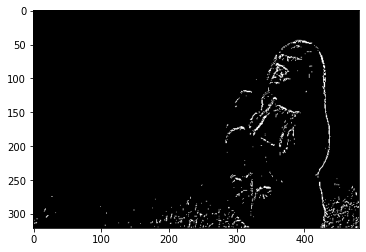

In [21]:
img_gur_sob = sobel(img_gur)
plt.imshow(img_gur_sob,cmap = 'gray')

## Prewit Mask
The prewit mask works in a similar fashion however the kernals used are slightly different. These kernals do not place any emphasis on the pixels closer to the centre of the mask. A similar implementation is given here 

In [22]:
def prewit(img):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    gx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    gy = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

    img_gx = cv.filter2D(img_gray,-1,gx)
    img_gy = cv.filter2D(img_gray,-1,gy)

    img_filt = img_gx + img_gy
    
    t,img_out = cv.threshold(img_filt,150,255,cv.THRESH_BINARY)
    return img_out

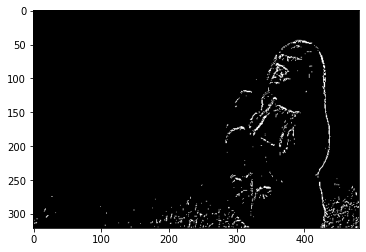

In [23]:
img_gur_pre = sobel(img_gur)
plt.imshow(img_gur_pre,cmap = 'gray')

## Canny Edge Detection
As shown the performance of the two methods is very similar. Although a good level of performance is possible using these simple methods more optimal methods are available such as the Canny edge detection method. This method was designed to be more robust than filter based methods and therefore perform better. Also edges using this method are more precise, represented only by a single pixel<br>
The method has 3 stages:<br>
1-The image is smoothed using a gaussian filter<br>
2-The gradients of this smoothed image are then found using sobel masks shown previously<br>
3-The angle of the gradient is then found (this is generally rounded to either horizontal,vertical or the two diagonal directions)<br>
4-Non maximum suppression is performed, this is where pixel values along the edge direction which are not a local maximum are set to 0, this means an edge is then represented by a single pixel<br>
5-Apply hysterises thresholding to select final edges<br>
For more information on the canny edge detection method consult https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

In [127]:
def canny(img):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #image is gaussian smoothed
    img_gauss = cv.GaussianBlur(img_gray,(5,5),0)

    #Gradient of smoothed image found with sobel masks
    gx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    gy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    img_gx = cv.filter2D(img_gauss,-1,gx)
    img_gy = cv.filter2D(img_gauss,-1,gy)
    img_grad = np.hypot(img_gx,img_gy)

    #angle of gradient found and non-maxima supression applied
    angle = np.arctan2(img_gx,img_gy)

    #Round the angle of the angles to nearest 45 degrees and perform non-maxima supression
    angle_degrees = angle * 180. / np.pi
    angle_degrees[angle_degrees < 0] += 180
    img_nms = np.zeros(np.shape(img_grad))

    for i in range(1,np.shape(angle)[0]-1):
        for j in range(1,np.shape(angle)[1]-1):
            theta = angle_degrees[i,j]
            if (0 <= theta < 22.5) or (157.5 <= angle_degrees[i,j] <= 180):
                n = img_grad[i,j+1]
                m = img_grad[i,j-1]
            elif (22.5 <= angle_degrees[i,j] < 67.5):
                n = img_grad[i+1,j-1]
                m = img_grad[i-1,j+1]
            elif (67.5 <= angle_degrees[i,j] < 112.5):
                n = img_grad[i+1,j]
                m = img_grad[i-1,j]
            elif (112.5 <= angle_degrees[i,j] < 157.5):
                n = img_grad[i-1,j-1]
                m = img_grad[i+1,j+1]
            
            if (img_grad[i,j] >= n) and (img_grad[i,j] >= m):
                img_nms[i,j] = img_grad[i,j]
    
    #Perform Hysteresis thresholding
    img_out = filters.apply_hysteresis_threshold(img_nms,20,50)

    return img_out




    

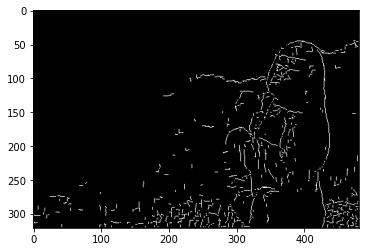

In [128]:
img_gur_canny = canny(img_gur)
plt.imshow(img_gur_canny,cmap = 'gray')